Maximum Likelihood Estimation VS Maximum A Posteriori Estimation
=========================================================

Suppose that we want to etimate the rate parameter $\lambda$ of a Poisson distribution by sammpling an independent sample $\mathcal{D}$ of size $n$. Let's assume that the true value of $\lambda$ is 2.


## Maximum Likelihood Estimation

First, let's find an estimate $\hat{\lambda}$ using Maximum Likelihood Estimation (MLE). Knowing that the each element $\{x_i\}^{n}_{i=1}$ is distributed according to a Poisson distribution implies that the probability of observing the data given $\lambda$ is:

\begin{align}
\label{eq:likelihood}
P(\mathcal{D} | \lambda) &= P( x_1, x_2, ..., x_n | \lambda )\tag{1} \\
                         &= \prod^{n}_{i=1} P(x_i | \lambda).\tag{2}
\end{align}

Note that the step from line 1 to line 2 is possible because the samples are independent. The next step is to find the value, $\hat{\lambda}$ that maximizes the likelihood $P( \mathcal{D} | \lambda)$. To do so, we can take the derivative with respect to $\lambda$ in Equation (\ref{eq:likelihood}). However, it will often be easier to derivate the log-likelihood function instead, which has the same maximum because of the monotonicity of the logarithmic function. Hence, instead of taking the derivative of Equation (\ref{eq:likelihood}), we can take the derivative of:

\begin{align}
    \ln P(\mathcal{D} | \lambda) &= \sum^{n}_{i=1} \ln P(x_i | \lambda)
                                 = \sum^{n}_{i=1} \ln \frac{\lambda^{x_i} e^{-\lambda}}{x_i!} 
                                 = \sum^{n}_{i=1} x_i \ln \lambda -  \lambda - \ln x_i!
                                 = \ln \lambda \sum^n_{i=1} x_i -n \lambda - \sum^n_{i=1} \sum^{x_i}_{j=1} \ln j.
\end{align}

Note that used the fact that the probability mass function of $x_i$ is $P(x_i | \lambda) = \frac{\lambda^{x_i} e^{-\lambda}}{x_i!}$. Now by taking the derivative with respect to $\lambda$, setting it equal to zero, and solving for $\lambda$ we get:

\begin{align}
& \frac{d}{d \lambda} \ln P(\mathcal{D} | \lambda) = \frac{\sum^n_{i=1} x_i}{ \lambda } - n = 0 \\
& \Rightarrow \hat{\lambda} = \frac{\sum^n_{i=1}}{n}.
\end{align}

Now that we have derived the MLE estimate of $\lambda$, let's see how accurate it is based on differen sample sizes. For this small experiment, we will use sample sizes $n$ in \{5, 10, 20, 40, 80, 160, 320, 640, 1280\}.

Let's start by importing the necessary libraries.

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.stats import t

Now let's define a Poisson probability distribution with rate parameter $\lambda$ equal to 2 and draw a sample sample of 10.

In [84]:
true_lambda = 2
dist = poisson(true_lambda)
print(dist.rvs(10))

[1 1 3 1 0 3 4 4 2 1]


Note that even if the expected value of the distribution is 2, most of the values in the sample are not equal to 2. 

Now, let's see how the MLE estimate varies according to the sample size.

In [85]:
sample_sizes = [5, 10, 20, 40, 80, 160, 320, 640, 1280]

for n in sample_sizes:
    # draw a random sample of size n
    random_sample = dist.rvs(n)
    # compute the mle estimate
    mle_estimate = np.sum(random_sample) / n
    # print results
    print("=== sample size =", n, "===")
    print("\t MLE estimate is:", mle_estimate)

=== sample size = 5 ===
	 MLE estimate is: 4.2
=== sample size = 10 ===
	 MLE estimate is: 2.4
=== sample size = 20 ===
	 MLE estimate is: 2.35
=== sample size = 40 ===
	 MLE estimate is: 2.0
=== sample size = 80 ===
	 MLE estimate is: 2.225
=== sample size = 160 ===
	 MLE estimate is: 1.95
=== sample size = 320 ===
	 MLE estimate is: 2.11875
=== sample size = 640 ===
	 MLE estimate is: 1.9703125
=== sample size = 1280 ===
	 MLE estimate is: 1.99765625


Run the previous code several times and see how the results change every time. Generally, you will see that the estimate varies less as the sample size increases. However, as you may note, it is difficult to understand the variability of the estimate based on this. To gain more insight, let's take a large number of samples of several estimates computed using the same sample size and compute the average and standard deviation of the estimate.

=== sample size = 5 ===
	average of the MLE estimate: 2.0036
	standard deviation of the MLE estimate: 0.6392
=== sample size = 10 ===
	average of the MLE estimate: 1.9926
	standard deviation of the MLE estimate: 0.4493
=== sample size = 20 ===
	average of the MLE estimate: 1.996
	standard deviation of the MLE estimate: 0.3154
=== sample size = 40 ===
	average of the MLE estimate: 2.01
	standard deviation of the MLE estimate: 0.2205
=== sample size = 80 ===
	average of the MLE estimate: 1.9982
	standard deviation of the MLE estimate: 0.1589
=== sample size = 160 ===
	average of the MLE estimate: 1.9967
	standard deviation of the MLE estimate: 0.1091
=== sample size = 320 ===
	average of the MLE estimate: 1.9987
	standard deviation of the MLE estimate: 0.0786
=== sample size = 640 ===
	average of the MLE estimate: 1.9985
	standard deviation of the MLE estimate: 0.0542
=== sample size = 1280 ===
	average of the MLE estimate: 2.0004
	standard deviation of the MLE estimate: 0.0376


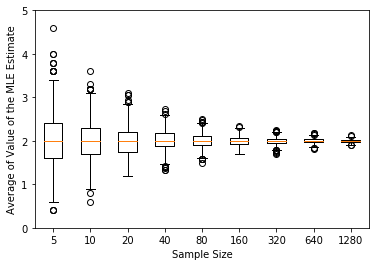

In [91]:
number_of_samples = 1000
raw_data = np.zeros((number_of_samples, len(sample_sizes)), dtype=np.float64)
mle_estimates_avg = np.zeros(len(sample_sizes), dtype=np.float64)
mle_estimates_stddev = np.zeros(len(sample_sizes), dtype=np.float64)

for j, n in enumerate(sample_sizes):
    temp_averages = np.zeros(number_of_samples)
    for i in range(number_of_samples):
        # draw a random sample of size n
        random_sample = dist.rvs(n)
        # compute the mle estimate
        mle_estimate = np.sum(random_sample) / n
        temp_averages[i] = mle_estimate
        raw_data[i, j] = mle_estimate
    # computing the average of the mle estimates
    mle_estimates_avg[j] = np.average(temp_averages)
    mle_estimates_stddev[j] = np.std(temp_averages, ddof=1)
    print("=== sample size =", n, "===")
    print("\taverage of the MLE estimate:", np.round(mle_estimates_avg[j], 4))
    print("\tstandard deviation of the MLE estimate:", np.round(mle_estimates_stddev[j], 4))

# Box plot of the spread of the MLE estimate for each sample size
plt.boxplot(raw_data)
loc, labels = plt.xticks()
plt.xticks(loc, sample_sizes)
plt.xlabel("Sample Size")
plt.ylabel("Average of Value of the MLE Estimate")
plt.ylim([0,5])
plt.show()
        

Note that the average of the estimates, regardless of the sample size, is close to the true value. This indicates that our estimates are unbiased. However, note that the standard deviation of our estimates decreases as the sample size increases. This means that even if the MLE estimate computed using a sample size of 5 is unbiased, the variability of the estimate can result in an estimate that is far away from the true value.

## Maximum A Posteriori 

Now, let's suppose that we have some prior information about the distribution the rate parameter $\lambda$ and use such information to improve our estimate. Assume that we believe that our paramter is distributed to according to $P(\lambda)$. In order to add prior information to our parameter estimation, we can use Maximum A Posteriori (MAP) estimation where we are interested in finding the parameter $\lambda$ that maximizes $P(\mathcal{D}|\lambda) P(\lambda)$.

Once again, we can find the value of lambda that maximizes the likelihood by taking the derivative with respect to $\lambda$ and setting it to zero. And once again, we can take the derivative of the log-likelihood function instead.

\begin{align}
\ln P( \mathcal{D} | \lambda) P(\lambda) = \ln P( \mathcal{D} | \lambda) + \ln P(\lambda).
\end{align

We know from the previous section that:

\begin{align}
\frac{d}{d\lambda} P(\mathcal{D} | \lambda) = \frac{\sum^n_{i=1} x_i}{ \lambda } - n.
\end{align}

Hence, we just need to find the derivative of $P(\lambda)$. The derivative will depend on the particular distribution that we use for our prior believe. For example, if we believe that the parameter $\lambda$ follows a Uniform distribution with lower bound $a$ and upper bound $b$, then $P(\lambda) = \frac{1}{b-a}$. However, note that in that case, the derivative of $P(\lambda)$ with respect to $\lambda is equal to zero. Hence, when using a uniform prior, the MAP estimate is going to be the same as the MLE estimate. 


Now let's asusme that we believe that our parameter $\lambda$ is distributed according to a normal distribution with unit variance and some mena $\mu$. In such case, we have:

\begin{align}
& \ln P(\lambda) = \ln \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(\lambda - \mu)^2}{2 \sigma^2}} 
                = - \ln \sqrt{2 \pi \sigma^2} - \frac{(\lambda - \mu)^2}{2 \sigma^2},   \\
& \frac{d}{d\lambda} \ln P(\lambda) = \frac{\mu - \lambda}{\sigma^2}.
\end{align}

Then, by putting all together we get:

\begin{align}
& \ln P( \mathcal{D} | \lambda) P(\lambda) = 
    \frac{\sum^n_{i=1} x_i}{ \lambda } - n + \frac{\mu - \lambda}{\sigma^2}. = 0, \\
& \Rightarrow \sigma^2 \sum^n_{i=1} x_i = \lambda^2 + \lambda (\sigma^2 n - \mu) \\
& \Rightarrow \sigma^2 \sum^n_{i=1} x_i + \frac{1}{4}(\sigma^2 n-\mu)^2 = 
    \lambda^2 + \lambda (\sigma^2 n - \mu) + \frac{1}{4}(\sigma^2 n-\mu)^2 \\
& \Rightarrow \sigma^2 \sum^n_{i=1} x_i + \frac{1}{4}(\sigma^2 n-\mu)^2 
    = (\lambda + \frac{1}{2}(\sigma^2 n-\mu))^2 \\
& \Rightarrow \sqrt{\sigma^2 \sum^n_{i=1} x_i + \frac{1}{4}(\sigma^2 n-\mu)^2} = 
    \lambda + \frac{1}{2}(\sigma^2 n-\mu) \\
& \Rightarrow \hat{\lambda} =
    \sqrt{\sigma^2 \sum^n_{i=1} x_i + \frac{1}{4}(\sigma^2 n-\mu)^2} - \frac{1}{2}(\sigma^2 n-\mu).
\end{align}

Now, let's repeat the previous experiment and see how the values of $\mu$ and $\sigma$ affect our estimate. First let's study the way $\sigma$ affects our estimate. For this purpose, let's use a value of $\mu$ equal to two.

===== sigma = 0.1 =====
	=== sample size = 5 ===
		average of the Map estimate: 1.9996 standard deviation of the MAP estimate: 0.0149
	=== sample size = 10 ===
		average of the Map estimate: 1.9993 standard deviation of the MAP estimate: 0.0208
	=== sample size = 20 ===
		average of the Map estimate: 1.9989 standard deviation of the MAP estimate: 0.0285
	=== sample size = 40 ===
		average of the Map estimate: 1.9984 standard deviation of the MAP estimate: 0.0375
	=== sample size = 80 ===
		average of the Map estimate: 1.9988 standard deviation of the MAP estimate: 0.0437
	=== sample size = 160 ===
		average of the Map estimate: 1.9992 standard deviation of the MAP estimate: 0.0515
	=== sample size = 320 ===
		average of the Map estimate: 1.999 standard deviation of the MAP estimate: 0.0493
	=== sample size = 640 ===
		average of the Map estimate: 1.9984 standard deviation of the MAP estimate: 0.042
	=== sample size = 1280 ===
		average of the Map estimate: 2.0008 standard deviation of 

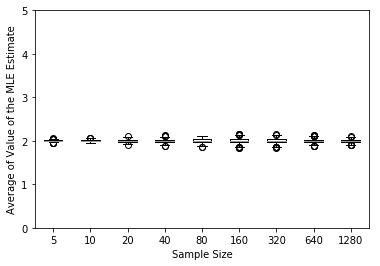

===== sigma = 0.2 =====
	=== sample size = 5 ===
		average of the Map estimate: 1.9976 standard deviation of the MAP estimate: 0.0566
	=== sample size = 10 ===
		average of the Map estimate: 2.0005 standard deviation of the MAP estimate: 0.0766
	=== sample size = 20 ===
		average of the Map estimate: 1.9938 standard deviation of the MAP estimate: 0.0898
	=== sample size = 40 ===
		average of the Map estimate: 2.0004 standard deviation of the MAP estimate: 0.1042
	=== sample size = 80 ===
		average of the Map estimate: 2.0027 standard deviation of the MAP estimate: 0.0941
	=== sample size = 160 ===
		average of the Map estimate: 1.9993 standard deviation of the MAP estimate: 0.0824
	=== sample size = 320 ===
		average of the Map estimate: 2.0005 standard deviation of the MAP estimate: 0.069
	=== sample size = 640 ===
		average of the Map estimate: 2.0033 standard deviation of the MAP estimate: 0.0525
	=== sample size = 1280 ===
		average of the Map estimate: 2.0007 standard deviation of

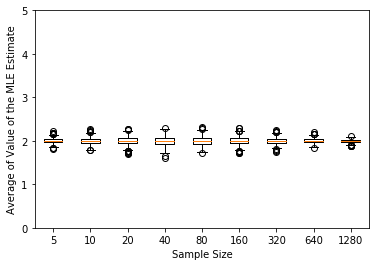

===== sigma = 0.5 =====
	=== sample size = 5 ===
		average of the Map estimate: 1.9878 standard deviation of the MAP estimate: 0.2421
	=== sample size = 10 ===
		average of the Map estimate: 1.9905 standard deviation of the MAP estimate: 0.2603
	=== sample size = 20 ===
		average of the Map estimate: 1.9838 standard deviation of the MAP estimate: 0.2312
	=== sample size = 40 ===
		average of the Map estimate: 1.9929 standard deviation of the MAP estimate: 0.1887
	=== sample size = 80 ===
		average of the Map estimate: 1.9931 standard deviation of the MAP estimate: 0.1442
	=== sample size = 160 ===
		average of the Map estimate: 2.0031 standard deviation of the MAP estimate: 0.1065
	=== sample size = 320 ===
		average of the Map estimate: 2.0008 standard deviation of the MAP estimate: 0.079
	=== sample size = 640 ===
		average of the Map estimate: 1.9976 standard deviation of the MAP estimate: 0.0551
	=== sample size = 1280 ===
		average of the Map estimate: 2.0006 standard deviation of

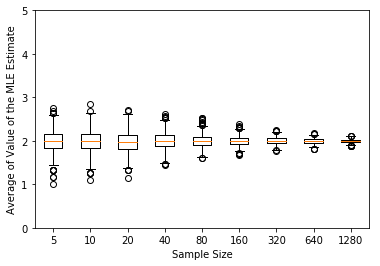

===== sigma = 1 =====
	=== sample size = 5 ===
		average of the Map estimate: 1.9522 standard deviation of the MAP estimate: 0.4511
	=== sample size = 10 ===
		average of the Map estimate: 1.9839 standard deviation of the MAP estimate: 0.3645
	=== sample size = 20 ===
		average of the Map estimate: 1.9997 standard deviation of the MAP estimate: 0.2816
	=== sample size = 40 ===
		average of the Map estimate: 2.0007 standard deviation of the MAP estimate: 0.2154
	=== sample size = 80 ===
		average of the Map estimate: 2.0075 standard deviation of the MAP estimate: 0.1568
	=== sample size = 160 ===
		average of the Map estimate: 2.0065 standard deviation of the MAP estimate: 0.1098
	=== sample size = 320 ===
		average of the Map estimate: 2.0014 standard deviation of the MAP estimate: 0.0767
	=== sample size = 640 ===
		average of the Map estimate: 2.0011 standard deviation of the MAP estimate: 0.0569
	=== sample size = 1280 ===
		average of the Map estimate: 2.0003 standard deviation of 

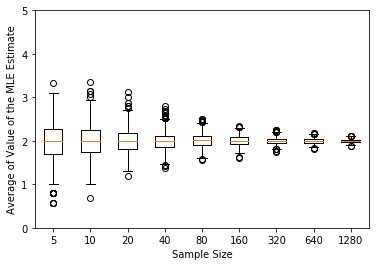

===== sigma = 2 =====
	=== sample size = 5 ===
		average of the Map estimate: 1.9647 standard deviation of the MAP estimate: 0.5718
	=== sample size = 10 ===
		average of the Map estimate: 1.9955 standard deviation of the MAP estimate: 0.4412
	=== sample size = 20 ===
		average of the Map estimate: 1.9847 standard deviation of the MAP estimate: 0.3231
	=== sample size = 40 ===
		average of the Map estimate: 1.9902 standard deviation of the MAP estimate: 0.2291
	=== sample size = 80 ===
		average of the Map estimate: 2.0049 standard deviation of the MAP estimate: 0.16
	=== sample size = 160 ===
		average of the Map estimate: 1.9967 standard deviation of the MAP estimate: 0.114
	=== sample size = 320 ===
		average of the Map estimate: 2.0017 standard deviation of the MAP estimate: 0.0798
	=== sample size = 640 ===
		average of the Map estimate: 1.9996 standard deviation of the MAP estimate: 0.0557
	=== sample size = 1280 ===
		average of the Map estimate: 2.0022 standard deviation of the

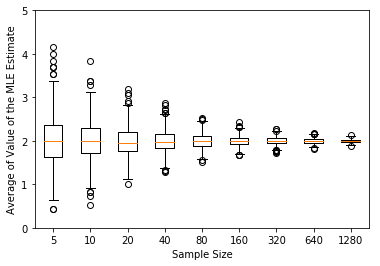

===== sigma = 5 =====
	=== sample size = 5 ===
		average of the Map estimate: 1.9675 standard deviation of the MAP estimate: 0.6321
	=== sample size = 10 ===
		average of the Map estimate: 1.9964 standard deviation of the MAP estimate: 0.4339
	=== sample size = 20 ===
		average of the Map estimate: 2.016 standard deviation of the MAP estimate: 0.318
	=== sample size = 40 ===
		average of the Map estimate: 1.9851 standard deviation of the MAP estimate: 0.2204
	=== sample size = 80 ===
		average of the Map estimate: 2.0003 standard deviation of the MAP estimate: 0.155
	=== sample size = 160 ===
		average of the Map estimate: 1.9973 standard deviation of the MAP estimate: 0.1066
	=== sample size = 320 ===
		average of the Map estimate: 1.9995 standard deviation of the MAP estimate: 0.0807
	=== sample size = 640 ===
		average of the Map estimate: 2.0016 standard deviation of the MAP estimate: 0.0568
	=== sample size = 1280 ===
		average of the Map estimate: 2.0015 standard deviation of the

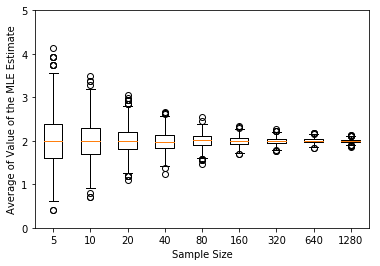

===== sigma = 10 =====
	=== sample size = 5 ===
		average of the Map estimate: 2.0127 standard deviation of the MAP estimate: 0.6635
	=== sample size = 10 ===
		average of the Map estimate: 1.9993 standard deviation of the MAP estimate: 0.4442
	=== sample size = 20 ===
		average of the Map estimate: 2.0105 standard deviation of the MAP estimate: 0.3291
	=== sample size = 40 ===
		average of the Map estimate: 1.9983 standard deviation of the MAP estimate: 0.2243
	=== sample size = 80 ===
		average of the Map estimate: 1.9972 standard deviation of the MAP estimate: 0.1516
	=== sample size = 160 ===
		average of the Map estimate: 2.0067 standard deviation of the MAP estimate: 0.1124
	=== sample size = 320 ===
		average of the Map estimate: 2.0012 standard deviation of the MAP estimate: 0.0801
	=== sample size = 640 ===
		average of the Map estimate: 2.0 standard deviation of the MAP estimate: 0.0555
	=== sample size = 1280 ===
		average of the Map estimate: 2.0006 standard deviation of th

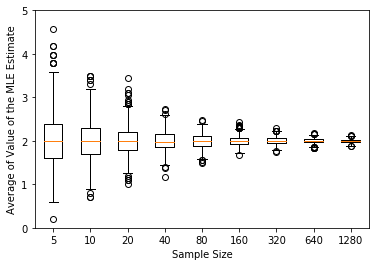

===== sigma = 100 =====
	=== sample size = 5 ===
		average of the Map estimate: 2.0044 standard deviation of the MAP estimate: 0.6012
	=== sample size = 10 ===
		average of the Map estimate: 1.9935 standard deviation of the MAP estimate: 0.4527
	=== sample size = 20 ===
		average of the Map estimate: 2.0117 standard deviation of the MAP estimate: 0.3221
	=== sample size = 40 ===
		average of the Map estimate: 2.0046 standard deviation of the MAP estimate: 0.2262
	=== sample size = 80 ===
		average of the Map estimate: 1.9983 standard deviation of the MAP estimate: 0.1558
	=== sample size = 160 ===
		average of the Map estimate: 2.0022 standard deviation of the MAP estimate: 0.1073
	=== sample size = 320 ===
		average of the Map estimate: 2.0035 standard deviation of the MAP estimate: 0.0804
	=== sample size = 640 ===
		average of the Map estimate: 1.9992 standard deviation of the MAP estimate: 0.0572
	=== sample size = 1280 ===
		average of the Map estimate: 2.0003 standard deviation o

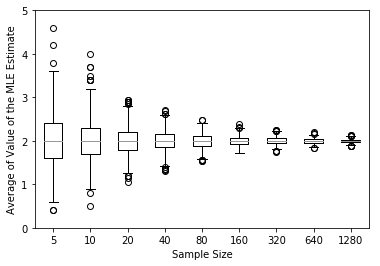

In [87]:
def compute_map_estimate_with_normal_prior(data, n, mu, sigma):
    return np.sqrt(sigma**2 * np.sum(data)  + (1/4) * np.power((sigma**2 * n - mu), 2)) - (1/2) * (sigma**2 * n - mu)

mu = 2
sigmas = [0.1, 0.2, 0.5, 1, 2, 5, 10, 100]


for sigma in sigmas:
    raw_data = np.zeros((number_of_samples, len(sample_sizes)), dtype=np.float64)
    map_estimates_avg = np.zeros(len(sample_sizes), dtype=np.float64)
    map_estimates_stddev = np.zeros(len(sample_sizes), dtype=np.float64)
    
    print("===== sigma =", sigma, "=====")
    for j, n in enumerate(sample_sizes):
        temp_averages = np.zeros(number_of_samples)
        for i in range(number_of_samples):
            # draw a random sample of size n
            random_sample = dist.rvs(n)
            # compute the mle estimate
            map_estimate = compute_map_estimate_with_normal_prior(random_sample, n, mu, sigma)
            temp_averages[i] = map_estimate
            raw_data[i, j] = map_estimate
        # computing the average of the mle estimates
        map_estimates_avg[j] = np.average(temp_averages)
        map_estimates_stddev[j] = np.std(temp_averages, ddof=1)
        print("\t=== sample size =", n, "===")
        print("\t\taverage of the MAP estimate:", np.round(map_estimates_avg[j],4), 
              "standard deviation of the MAP estimate:", np.round(map_estimates_stddev[j],4))
        

    # Box plot of the spread of the MLE estimate for each sample size
    plt.boxplot(raw_data)
    loc, labels = plt.xticks()
    plt.xticks(loc, sample_sizes)
    plt.xlabel("Sample Size")
    plt.ylabel("Average of Value of the MLE Estimate")
    plt.ylim([0,5])
    plt.show()
        

There are three main insights we can gain from the experiment above. First, we see the same pattern as in the case of MLE, the larger the sample size, the smaller the variance. Second, the value of $\sigma$ can considerably decrease the variance of our estimate. Third, even with very large values of $\sigma$, the variance of the MAP estimate is not larger than the variance of the MLE estimate. This is the advantage of the MAP estimate; by using prior information when computing $\hat{\lambda}$, we can reduce the variance of our estimate

Now, let's study how the value of the parameter $\mu$ affects our estimate. For this part, we will use a value of $\sigma$ of 0.5.

===== mu = 0 =====
	=== sample size = 5 ===
		average of the MAP estimate: 1.0625 standard deviation of the MAP estimate: 0.2363
	=== sample size = 10 ===
		average of the MAP estimate: 1.3041 standard deviation of the MAP estimate: 0.2108
	=== sample size = 20 ===
		average of the MAP estimate: 1.52 standard deviation of the MAP estimate: 0.1911
	=== sample size = 40 ===
		average of the MAP estimate: 1.7097 standard deviation of the MAP estimate: 0.1703
	=== sample size = 80 ===
		average of the MAP estimate: 1.8297 standard deviation of the MAP estimate: 0.1338
	=== sample size = 160 ===
		average of the MAP estimate: 1.9064 standard deviation of the MAP estimate: 0.103
	=== sample size = 320 ===
		average of the MAP estimate: 1.9613 standard deviation of the MAP estimate: 0.0759
	=== sample size = 640 ===
		average of the MAP estimate: 1.9742 standard deviation of the MAP estimate: 0.0553
	=== sample size = 1280 ===
		average of the MAP estimate: 1.9888 standard deviation of the MA

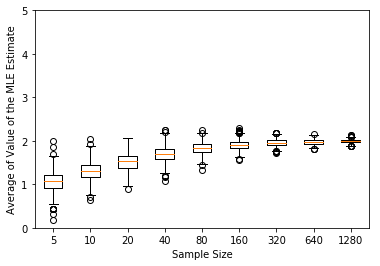

===== mu = 0.5 =====
	=== sample size = 5 ===
		average of the MAP estimate: 1.2241 standard deviation of the MAP estimate: 0.2419
	=== sample size = 10 ===
		average of the MAP estimate: 1.4487 standard deviation of the MAP estimate: 0.234
	=== sample size = 20 ===
		average of the MAP estimate: 1.6235 standard deviation of the MAP estimate: 0.1986
	=== sample size = 40 ===
		average of the MAP estimate: 1.7805 standard deviation of the MAP estimate: 0.1767
	=== sample size = 80 ===
		average of the MAP estimate: 1.8732 standard deviation of the MAP estimate: 0.1321
	=== sample size = 160 ===
		average of the MAP estimate: 1.9279 standard deviation of the MAP estimate: 0.0991
	=== sample size = 320 ===
		average of the MAP estimate: 1.9659 standard deviation of the MAP estimate: 0.0751
	=== sample size = 640 ===
		average of the MAP estimate: 1.9826 standard deviation of the MAP estimate: 0.0533
	=== sample size = 1280 ===
		average of the MAP estimate: 1.9898 standard deviation of th

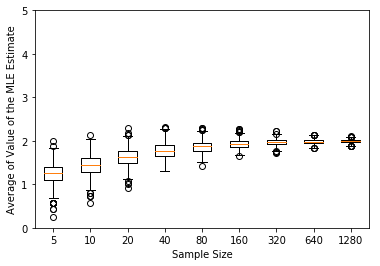

===== mu = 1 =====
	=== sample size = 5 ===
		average of the MAP estimate: 1.4421 standard deviation of the MAP estimate: 0.2538
	=== sample size = 10 ===
		average of the MAP estimate: 1.5899 standard deviation of the MAP estimate: 0.2385
	=== sample size = 20 ===
		average of the MAP estimate: 1.7413 standard deviation of the MAP estimate: 0.2104
	=== sample size = 40 ===
		average of the MAP estimate: 1.8411 standard deviation of the MAP estimate: 0.1778
	=== sample size = 80 ===
		average of the MAP estimate: 1.9093 standard deviation of the MAP estimate: 0.1391
	=== sample size = 160 ===
		average of the MAP estimate: 1.9554 standard deviation of the MAP estimate: 0.0996
	=== sample size = 320 ===
		average of the MAP estimate: 1.976 standard deviation of the MAP estimate: 0.0755
	=== sample size = 640 ===
		average of the MAP estimate: 1.9857 standard deviation of the MAP estimate: 0.0543
	=== sample size = 1280 ===
		average of the MAP estimate: 1.9932 standard deviation of the 

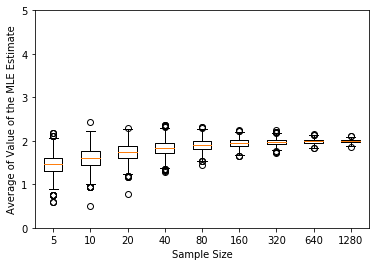

===== mu = 1.5 =====
	=== sample size = 5 ===
		average of the MAP estimate: 1.6933 standard deviation of the MAP estimate: 0.2516
	=== sample size = 10 ===
		average of the MAP estimate: 1.7791 standard deviation of the MAP estimate: 0.2445
	=== sample size = 20 ===
		average of the MAP estimate: 1.8507 standard deviation of the MAP estimate: 0.2127
	=== sample size = 40 ===
		average of the MAP estimate: 1.9157 standard deviation of the MAP estimate: 0.1814
	=== sample size = 80 ===
		average of the MAP estimate: 1.9476 standard deviation of the MAP estimate: 0.1406
	=== sample size = 160 ===
		average of the MAP estimate: 1.9762 standard deviation of the MAP estimate: 0.1062
	=== sample size = 320 ===
		average of the MAP estimate: 1.9878 standard deviation of the MAP estimate: 0.0751
	=== sample size = 640 ===
		average of the MAP estimate: 1.9939 standard deviation of the MAP estimate: 0.0547
	=== sample size = 1280 ===
		average of the MAP estimate: 1.9933 standard deviation of t

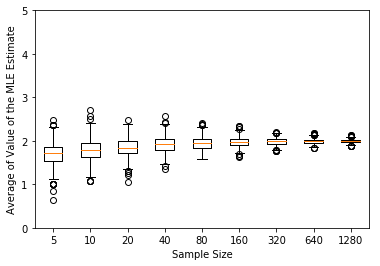

===== mu = 2 =====
	=== sample size = 5 ===
		average of the MAP estimate: 1.992 standard deviation of the MAP estimate: 0.2404
	=== sample size = 10 ===
		average of the MAP estimate: 1.9808 standard deviation of the MAP estimate: 0.2623
	=== sample size = 20 ===
		average of the MAP estimate: 1.9944 standard deviation of the MAP estimate: 0.2273
	=== sample size = 40 ===
		average of the MAP estimate: 1.9894 standard deviation of the MAP estimate: 0.1904
	=== sample size = 80 ===
		average of the MAP estimate: 1.9948 standard deviation of the MAP estimate: 0.1408
	=== sample size = 160 ===
		average of the MAP estimate: 2.0004 standard deviation of the MAP estimate: 0.1039
	=== sample size = 320 ===
		average of the MAP estimate: 1.9945 standard deviation of the MAP estimate: 0.0776
	=== sample size = 640 ===
		average of the MAP estimate: 1.9994 standard deviation of the MAP estimate: 0.055
	=== sample size = 1280 ===
		average of the MAP estimate: 2.0 standard deviation of the MAP 

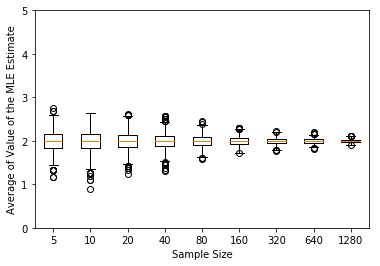

===== mu = 2.5 =====
	=== sample size = 5 ===
		average of the MAP estimate: 2.3151 standard deviation of the MAP estimate: 0.2348
	=== sample size = 10 ===
		average of the MAP estimate: 2.2272 standard deviation of the MAP estimate: 0.2575
	=== sample size = 20 ===
		average of the MAP estimate: 2.1321 standard deviation of the MAP estimate: 0.2301
	=== sample size = 40 ===
		average of the MAP estimate: 2.0809 standard deviation of the MAP estimate: 0.1887
	=== sample size = 80 ===
		average of the MAP estimate: 2.0366 standard deviation of the MAP estimate: 0.1414
	=== sample size = 160 ===
		average of the MAP estimate: 2.0202 standard deviation of the MAP estimate: 0.1044
	=== sample size = 320 ===
		average of the MAP estimate: 2.0185 standard deviation of the MAP estimate: 0.0784
	=== sample size = 640 ===
		average of the MAP estimate: 2.007 standard deviation of the MAP estimate: 0.0558
	=== sample size = 1280 ===
		average of the MAP estimate: 2.0026 standard deviation of th

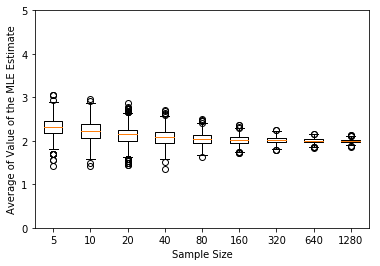

===== mu = 3 =====
	=== sample size = 5 ===
		average of the MAP estimate: 2.6761 standard deviation of the MAP estimate: 0.2181
	=== sample size = 10 ===
		average of the MAP estimate: 2.4906 standard deviation of the MAP estimate: 0.2583
	=== sample size = 20 ===
		average of the MAP estimate: 2.3081 standard deviation of the MAP estimate: 0.243
	=== sample size = 40 ===
		average of the MAP estimate: 2.1843 standard deviation of the MAP estimate: 0.2031
	=== sample size = 80 ===
		average of the MAP estimate: 2.0936 standard deviation of the MAP estimate: 0.1508
	=== sample size = 160 ===
		average of the MAP estimate: 2.0506 standard deviation of the MAP estimate: 0.1089
	=== sample size = 320 ===
		average of the MAP estimate: 2.0225 standard deviation of the MAP estimate: 0.0804
	=== sample size = 640 ===
		average of the MAP estimate: 2.0105 standard deviation of the MAP estimate: 0.0552
	=== sample size = 1280 ===
		average of the MAP estimate: 2.007 standard deviation of the M

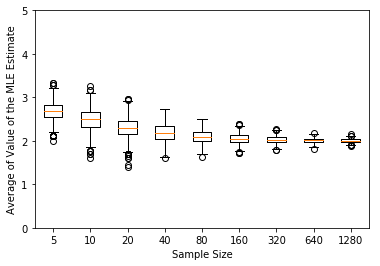

===== mu = 3.5 =====
	=== sample size = 5 ===
		average of the MAP estimate: 3.0605 standard deviation of the MAP estimate: 0.2076
	=== sample size = 10 ===
		average of the MAP estimate: 2.775 standard deviation of the MAP estimate: 0.2409
	=== sample size = 20 ===
		average of the MAP estimate: 2.5003 standard deviation of the MAP estimate: 0.245
	=== sample size = 40 ===
		average of the MAP estimate: 2.2818 standard deviation of the MAP estimate: 0.198
	=== sample size = 80 ===
		average of the MAP estimate: 2.152 standard deviation of the MAP estimate: 0.1539
	=== sample size = 160 ===
		average of the MAP estimate: 2.0726 standard deviation of the MAP estimate: 0.1082
	=== sample size = 320 ===
		average of the MAP estimate: 2.0369 standard deviation of the MAP estimate: 0.076
	=== sample size = 640 ===
		average of the MAP estimate: 2.0185 standard deviation of the MAP estimate: 0.0558
	=== sample size = 1280 ===
		average of the MAP estimate: 2.0106 standard deviation of the MA

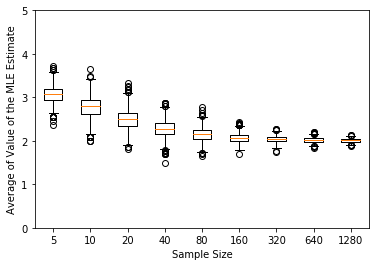

===== mu = 4 =====
	=== sample size = 5 ===
		average of the MAP estimate: 3.468 standard deviation of the MAP estimate: 0.1838
	=== sample size = 10 ===
		average of the MAP estimate: 3.1121 standard deviation of the MAP estimate: 0.2402
	=== sample size = 20 ===
		average of the MAP estimate: 2.7017 standard deviation of the MAP estimate: 0.2418
	=== sample size = 40 ===
		average of the MAP estimate: 2.3815 standard deviation of the MAP estimate: 0.217
	=== sample size = 80 ===
		average of the MAP estimate: 2.196 standard deviation of the MAP estimate: 0.1577
	=== sample size = 160 ===
		average of the MAP estimate: 2.1061 standard deviation of the MAP estimate: 0.1059
	=== sample size = 320 ===
		average of the MAP estimate: 2.0521 standard deviation of the MAP estimate: 0.0765
	=== sample size = 640 ===
		average of the MAP estimate: 2.0283 standard deviation of the MAP estimate: 0.0559
	=== sample size = 1280 ===
		average of the MAP estimate: 2.0127 standard deviation of the MA

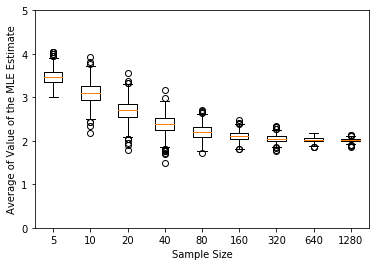

===== mu = 4.5 =====
	=== sample size = 5 ===
		average of the MAP estimate: 3.8918 standard deviation of the MAP estimate: 0.1758
	=== sample size = 10 ===
		average of the MAP estimate: 3.4558 standard deviation of the MAP estimate: 0.2299
	=== sample size = 20 ===
		average of the MAP estimate: 2.903 standard deviation of the MAP estimate: 0.2502
	=== sample size = 40 ===
		average of the MAP estimate: 2.4948 standard deviation of the MAP estimate: 0.214
	=== sample size = 80 ===
		average of the MAP estimate: 2.2532 standard deviation of the MAP estimate: 0.1605
	=== sample size = 160 ===
		average of the MAP estimate: 2.1275 standard deviation of the MAP estimate: 0.1135
	=== sample size = 320 ===
		average of the MAP estimate: 2.063 standard deviation of the MAP estimate: 0.0789
	=== sample size = 640 ===
		average of the MAP estimate: 2.0342 standard deviation of the MAP estimate: 0.0564
	=== sample size = 1280 ===
		average of the MAP estimate: 2.0147 standard deviation of the 

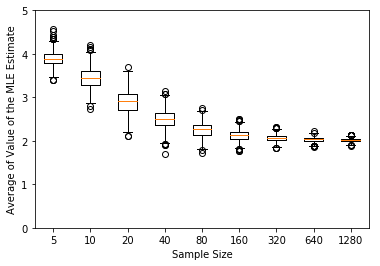

===== mu = 5 =====
	=== sample size = 5 ===
		average of the MAP estimate: 4.3258 standard deviation of the MAP estimate: 0.1609
	=== sample size = 10 ===
		average of the MAP estimate: 3.8127 standard deviation of the MAP estimate: 0.2088
	=== sample size = 20 ===
		average of the MAP estimate: 3.166 standard deviation of the MAP estimate: 0.2425
	=== sample size = 40 ===
		average of the MAP estimate: 2.6153 standard deviation of the MAP estimate: 0.208
	=== sample size = 80 ===
		average of the MAP estimate: 2.3041 standard deviation of the MAP estimate: 0.1634
	=== sample size = 160 ===
		average of the MAP estimate: 2.1564 standard deviation of the MAP estimate: 0.1139
	=== sample size = 320 ===
		average of the MAP estimate: 2.0735 standard deviation of the MAP estimate: 0.0803
	=== sample size = 640 ===
		average of the MAP estimate: 2.0346 standard deviation of the MAP estimate: 0.0556
	=== sample size = 1280 ===
		average of the MAP estimate: 2.0185 standard deviation of the M

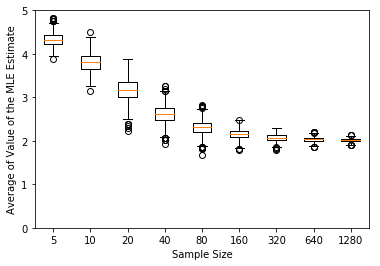

In [92]:
mus = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
sigma = 0.5

for mu in mus:
    raw_data = np.zeros((number_of_samples, len(sample_sizes)), dtype=np.float64)
    map_estimates_avg = np.zeros(len(sample_sizes), dtype=np.float64)
    map_estimates_stddev = np.zeros(len(sample_sizes), dtype=np.float64)
    
    print("===== mu =", mu, "=====")
    for j, n in enumerate(sample_sizes):
        temp_averages = np.zeros(number_of_samples)
        for i in range(number_of_samples):
            # draw a random sample of size n
            random_sample = dist.rvs(n)
            # compute the mle estimate
            map_estimate = compute_map_estimate_with_normal_prior(random_sample, n, mu, sigma)
            temp_averages[i] = map_estimate
            raw_data[i, j] = map_estimate
        # computing the average of the mle estimates
        map_estimates_avg[j] = np.average(temp_averages)
        map_estimates_stddev[j] = np.std(temp_averages, ddof=1)
        print("\t=== sample size =", n, "===")
        print("\t\taverage of the MAP estimate:", np.round(map_estimates_avg[j],4), 
              "standard deviation of the MAP estimate:", np.round(map_estimates_stddev[j],4))
        

    # Box plot of the spread of the MLE estimate for each sample size
    plt.boxplot(raw_data)
    loc, labels = plt.xticks()
    plt.xticks(loc, sample_sizes)
    plt.xlabel("Sample Size")
    plt.ylabel("Average of Value of the MLE Estimate")
    plt.ylim([0,5])
    plt.show()

This clearly illustrates the disadvantage of MAP estimation. If our prior is very poor, we can severely bias our estimate. However, as our sample size increases, the initial bias of our prior has less influence in our estimate.